# Sensing matrix
It is obtained by calculating the slope of error signals at the operating point (Lx-Ly=17.94,Lp=14.81 , Rprm=0.9894, ETMx Phi=90)

In [1]:
# Input file  

incode= """
l i1 1 0 n0
mod eo1 9000k .18 1 pm n0 n1 

s s1 1 n1 n4

m PRM 0 1 0 n4 n5 # chosen arbitrarily will optimize it 
s lp 1 n5 n6
bs mainbs 0.5 0.5 0 45 n6  n7 n10 n13
s ly 1 n7 n8 
m1 ETMY 5e-06 3.75e-05 0 n8 n9
s lx 1 n10 n11
m1 ETMX 5e-06 3.75e-05 0 n11 n12
s ls 1 n13 n14


#xaxis lx L lin 0 2.128e-6 1000
xaxis ETMX phi lin 0 360 359

# pd0 PIn n4*
# pd0 AfterPRM n5
# pd0 InBS n6*
# pd0 Outy n7
# pd0 Outx n10

# pd0 iny n7*
# pd0 inx n10*
# pd0 ASDC n14

# pd0 Out n14
# pd0 REFLDC n4
# pd0 LeakX n9
# pd0 LeakY n12
#pd1 REFLI 9000k 0 n4
#pd1 REFLQ 9000k 90 n4
#pd1 ASQ 9000k 90 n14
#pd1 ASI 9000k 90 n14
#pd0 IatPRM n5*
#pd0 IatPRM n5*
#pd1 inphase 9000k 0 n1*
#pd1 quadrature 9000k 90 n1*
yaxis abs
"""

from mpl_toolkits.mplot3d import Axes3D
import pykat

import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
import numpy as np 
# from numpy import arange
HH=12
WW=7
plt.rcParams.update({'font.size': 15})

                                              ..-
    PyKat 1.1.380         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



## Calculating error signals at the operating point
At the operating point we vary each of the DOFs (Degree of freedom) one by one and monitor the value of the demodulated signals.
## 1. Keeping Ly fixed and moving Lx

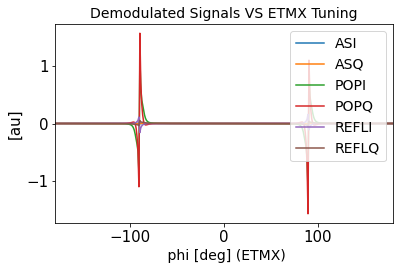

In [2]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
xaxis ETMX phi lin -180 180 359
""")


ob.lp.L=14.81
ob.ly.L=1
ob.lx.L=18.94
ob.PRM.R=.9894
ob.PRM.T=1-ob.PRM.R
res=ob.run()
fig = res.plot(title='Demodulated Signals VS ETMX Tuning')
plt.rcParams['figure.figsize'] = [HH,WW]

plt.show()

### Zoomed in around phi=90

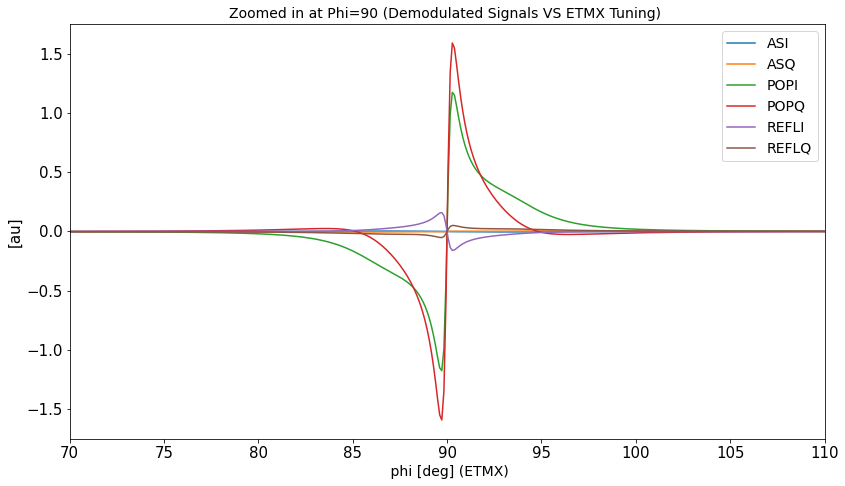

In [3]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
xaxis ETMX phi lin 70 110 359
""")

ob.lp.L=14.81
ob.ly.L=1
ob.lx.L=18.94
ob.PRM.R=.9894
ob.PRM.T=1-ob.PRM.R
res=ob.run()
fig = res.plot(title='Zoomed in at Phi=90 (Demodulated Signals VS ETMX Tuning) ')
plt.rcParams['figure.figsize'] = [HH,WW]

### Calculating the slopes of the signals at the operating point.

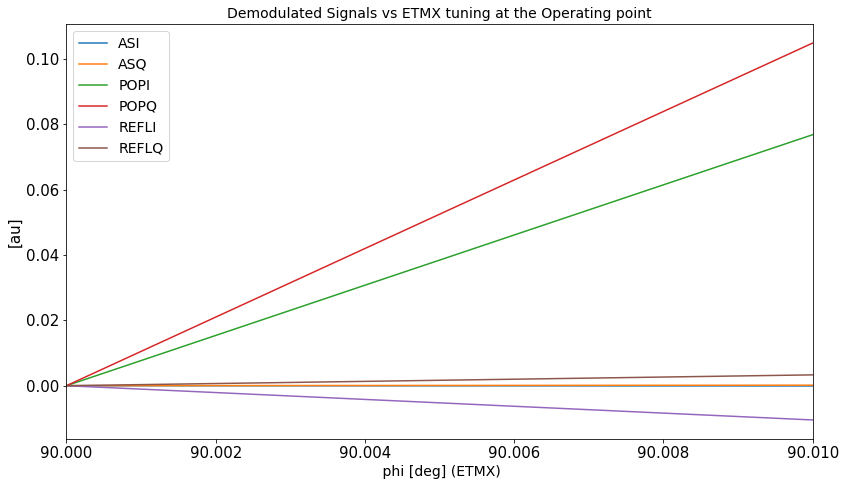

Slopes= [ 1.61e-04 -7.86e-05  1.05e-01  7.68e-02  3.31e-03 -1.05e-02]


In [4]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
xaxis ETMX phi lin 90 90.01 10
""")


ob.lp.L=14.81
ob.ly.L=1
ob.lx.L=18.94
ob.PRM.R=.9894
ob.PRM.T=1-ob.PRM.R
res=ob.run()
Sasq=res["ASQ"][-1]
Sasi=res["ASI"][-1]
Spopq=res["POPQ"][-1]
Spop=res["POPI"][-1]
Sreflq=res["REFLQ"][-1]
Srefli=res["REFLI"][-1]
# print(Sasq,Sasi,Spopq,Spop,Sreflq,Srefli)
# print('|',round(Sasq,4),'|',round(Sasi,4),'|',round(Spopq,4),'|',round(Spop,4),'|',round(Sreflq,4),'|',round(Srefli,4),'|')
# plt.figure(1)
np.set_printoptions(precision=2)
sx=np.array([Sasq,Sasi,Spopq,Spop,Sreflq,Srefli])
fig = res.plot(title="Demodulated Signals vs ETMX tuning at the Operating point")
print("Slopes=",sx)

## 2. Keeping Lx fixed and moving Ly

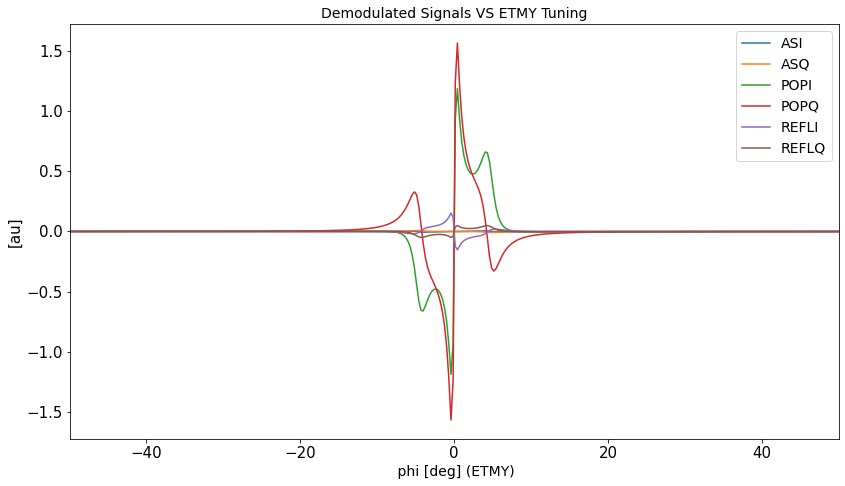

In [5]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
xaxis ETMY phi lin -50 50 359
""")

ob.ETMX.phi=90
ob.lp.L=14.81
ob.ly.L=1
ob.lx.L=18.94
ob.PRM.R=.9894
ob.PRM.T=1-ob.PRM.R
res=ob.run()
fig = res.plot(title='Demodulated Signals VS ETMY Tuning')


# plt.show()

### Calculating the slopes of the signals at the operating point.

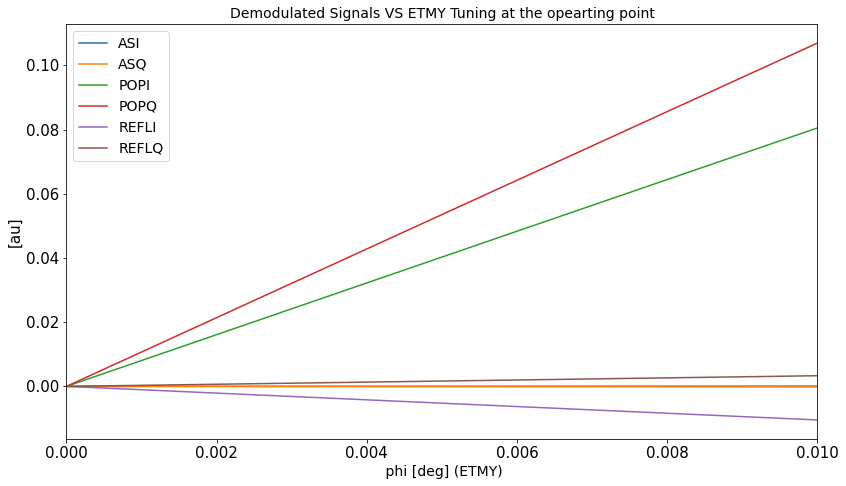

[-1.61e-04  7.86e-05  1.07e-01  8.05e-02  3.32e-03 -1.05e-02]


In [6]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
xaxis ETMY phi lin 0 0.01 10
""")

ob.ETMX.phi=90
ob.lp.L=14.81
ob.ly.L=1
ob.lx.L=18.94
ob.PRM.R=.9894
ob.PRM.T=1-ob.PRM.R
res=ob.run()
Sasq=res["ASQ"][-1]
Sasi=res["ASI"][-1]
Spopq=res["POPQ"][-1]
Spop=res["POPI"][-1]
Sreflq=res["REFLQ"][-1]
Srefli=res["REFLI"][-1]
# print(Sasq,Sasi,Spopq,Spop,Sreflq,Srefli)
# print('|',round(Sasq,4),'|',round(Sasi,4),'|',round(Spopq,4),'|',round(Spop,4),'|',round(Sreflq,4),'|',round(Srefli,4),'|')
# sy=[Sasq,Sasi,Spopq,Spop,Sreflq,Srefli]
sy=np.array([Sasq,Sasi,Spopq,Spop,Sreflq,Srefli])


fig = res.plot(title='Demodulated Signals VS ETMY Tuning at the opearting point')

print(sy)
# plt.show()

## 3. Keeping Lx , Ly fixed and moving the PRM Mirror

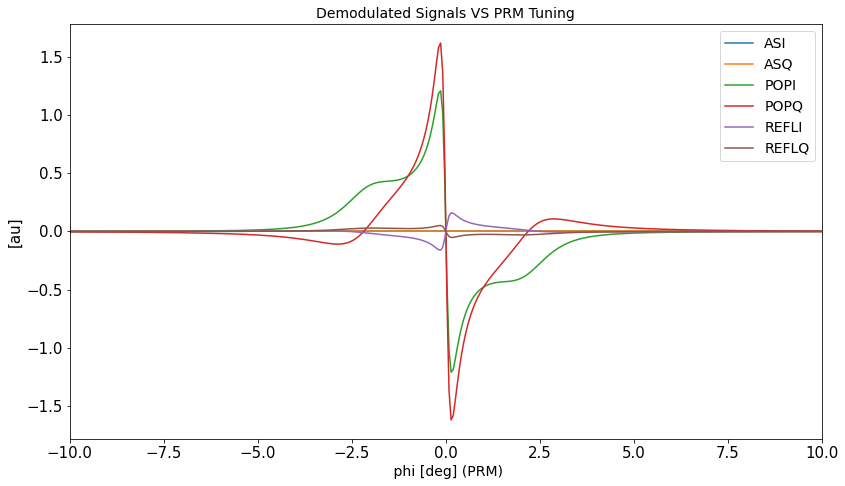

In [7]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
#xaxis ETMX phi lin -180 180 359
xaxis PRM phi lin -10 10 359
""")

ob.ETMX.phi=90
ob.lp.L=14.81
ob.ly.L=1
ob.lx.L=18.94
ob.PRM.R=.9894
ob.PRM.T=1-ob.PRM.R
res=ob.run()
fig = res.plot(title='Demodulated Signals VS PRM Tuning')


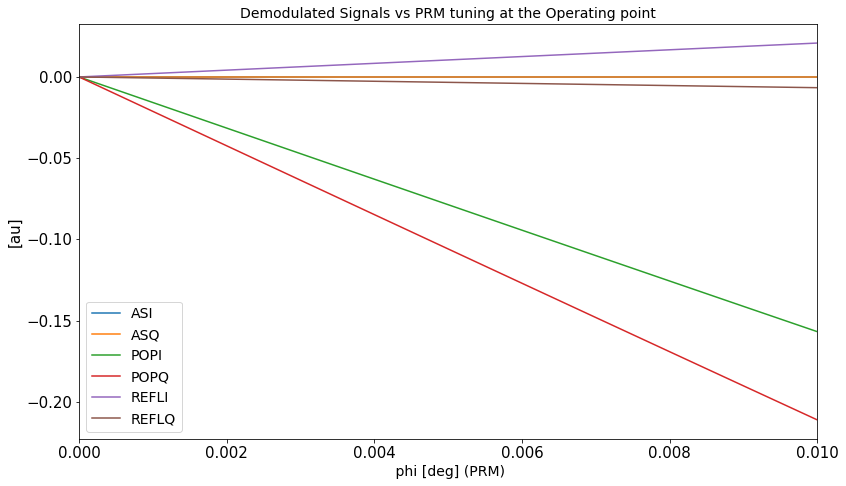

| Lx-Ly |1.61e-04 | -7.86e-05 | 1.05e-01 | 7.68e-02 | 3.31e-03 | -1.05e-02 | 
| Ly-Lx |-1.61e-04 | 7.86e-05 | 1.07e-01 | 8.05e-02 | 3.32e-03 | -1.05e-02 | 
| CARM |1.61e-04 | -7.86e-05 | -1.08e-03 | -1.87e-03 | -5.73e-06 | -9.91e-06 | 
| DARM |1.25e-09 | -3.55e-09 | 1.06e-01 | 7.87e-02 | 3.32e-03 | -1.05e-02 | 
| Lp |-6.05e-17 | 2.96e-17 | -2.11e-01 | -1.57e-01 | -6.61e-03 | 2.09e-02 | 

In [8]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
#xaxis ETMX phi lin -180 180 359
xaxis PRM phi lin 0 0.01 10
""")

ob.ETMX.phi=90
ob.lp.L=14.81
ob.ly.L=1
ob.lx.L=18.94
ob.PRM.R=.9894
ob.PRM.T=1-ob.PRM.R
res=ob.run()
Sasq=res["ASQ"][-1]
Sasi=res["ASI"][-1]
Spopq=res["POPQ"][-1]
Spop=res["POPI"][-1]
Sreflq=res["REFLQ"][-1]
Srefli=res["REFLI"][-1]
# print(Sasq,Sasi,Spopq,Spop,Sreflq,Srefli)

# print('|',round(Sasq,4),'|',round(Sasi,4),'|',round(Spopq,4),'|',round(Spop,4),'|',round(Sreflq,4),'|',round(Srefli,4),'|')
sp=np.array([Sasq,Sasi,Spopq,Spop,Sreflq,Srefli])
fig = res.plot(title='Demodulated Signals vs PRM tuning at the Operating point')
# plt.title('')
# plt.show()
# print("Lx-Ly",sx)
# print("Ly-Lx",sy)
# print("carm",(sx-sy)/2)
# print("darm",(sx+sy)/2)
# print("Lp",sp)

#for printing Sensity matrix
np.set_printoptions(precision=2)
print("| Lx-Ly |",end='')
for i in range(6): 
    print("{:.2e}".format(sx[i]),'| ',end='')
print('')    
print("| Ly-Lx |",end='')
for i in range(6): 
    print("{:.2e}".format(sy[i]),'| ',end='')
    
print('')
print("| CARM |",end='')

for i in range(6): 
    print("{:.2e}".format((sx[i]-sy[i])/2),'| ',end='')    
    
print('')
print("| DARM |",end='')
for i in range(6): 
    print("{:.2e}".format((sx[i]+sy[i])/2),'| ',end='')      
print('')   
print("| Lp |",end='')
for i in range(6): 
    print("{:.2e}".format(sp[i]),'| ',end='')  



Sensing Matrix <br>
Units are watt per 10milli degree($\lambda$/36000) .

|       | ASQ    | ASI     | POPQ   | POPI  | REFLQ  | REFLI  |
|-------|--------|---------|--------|-------|--------|--------|
| Lx-Ly |1.61e-04 | -7.86e-05 | <b>1.05e-01</b> | 7.68e-02 | 3.31e-03 | -1.05e-02 | 
| Ly-Lx |-1.61e-04 | 7.86e-05 | <b>1.07e-01</b> | 8.05e-02 | 3.32e-03 | -1.05e-02 | 
| CARM |1.61e-04 | -7.86e-05 | <b>-1.08e-03</b> | -1.87e-03 | -5.73e-06 | -9.91e-06 | 
| DARM |1.25e-09 | -3.55e-09 | <b>1.06e-01</b> | 7.87e-02 | 3.32e-03 | -1.05e-02 | 
| Lp |-6.05e-17 | 2.96e-17 | <b>-2.11e-01</b> | -1.57e-01 | -6.61e-03 | 2.09e-02 | 

<br>
Sensitivity for CARM and DARM is obtained by adding and subtracting the two sensitivities.